# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
#from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [27]:
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
weather_api_key = os.getenv("weather_api_key")
type(weather_api_key)

str

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city+'&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chihuahua
Processing Record 2 of Set 1 | ulladulla
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | timmins
Processing Record 7 of Set 1 | marseille
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | pasighat
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | gordeyevka
Processing Record 19 of Set 1 | nouadhibou
Processing Record 20 of Set 1 | gelemso
Processing Record 21 of Set 1 | pullampadi
City not found. Skipping...
Processing Re

Processing Record 39 of Set 4 | itarema
Processing Record 40 of Set 4 | kharitonovo
Processing Record 41 of Set 4 | smithers
Processing Record 42 of Set 4 | mezen
Processing Record 43 of Set 4 | tianpeng
Processing Record 44 of Set 4 | margate
Processing Record 45 of Set 4 | awjilah
Processing Record 46 of Set 4 | hay river
Processing Record 47 of Set 4 | lebu
Processing Record 48 of Set 4 | vardo
Processing Record 49 of Set 4 | harrisburg
Processing Record 0 of Set 5 | dudinka
Processing Record 1 of Set 5 | comodoro rivadavia
Processing Record 2 of Set 5 | obo
Processing Record 3 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 5 | nguruka
Processing Record 5 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 5 | chilca
Processing Record 7 of Set 5 | poum
Processing Record 8 of Set 5 | ilulissat
Processing Record 9 of Set 5 | tosya
Processing Record 10 of Set 5 | los llanos de aridane
Processing Record 11 of Set 5 | pa

Processing Record 19 of Set 8 | port lincoln
Processing Record 20 of Set 8 | maningrida
Processing Record 21 of Set 8 | havoysund
Processing Record 22 of Set 8 | lushunkou
City not found. Skipping...
Processing Record 23 of Set 8 | krasnyy tekstilshchik
City not found. Skipping...
Processing Record 24 of Set 8 | klyuchi
Processing Record 25 of Set 8 | anyama
Processing Record 26 of Set 8 | bilma
Processing Record 27 of Set 8 | winchester
Processing Record 28 of Set 8 | boyolangu
Processing Record 29 of Set 8 | ust-nera
Processing Record 30 of Set 8 | dossor
Processing Record 31 of Set 8 | mumford
Processing Record 32 of Set 8 | hamilton
Processing Record 33 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 34 of Set 8 | moyale
Processing Record 35 of Set 8 | buritis
Processing Record 36 of Set 8 | sobolevo
Processing Record 37 of Set 8 | vila
Processing Record 38 of Set 8 | weiser
Processing Record 39 of Set 8 | kieta
Processing Record 40 of Set 8 | banihal
Processing 

City not found. Skipping...
Processing Record 6 of Set 12 | podporozhye
Processing Record 7 of Set 12 | esmeraldas
Processing Record 8 of Set 12 | harper
Processing Record 9 of Set 12 | nantucket
Processing Record 10 of Set 12 | ayutla
Processing Record 11 of Set 12 | manthani
Processing Record 12 of Set 12 | ust-omchug
Processing Record 13 of Set 12 | banjar
Processing Record 14 of Set 12 | jedburgh
Processing Record 15 of Set 12 | kavaratti
Processing Record 16 of Set 12 | sri aman
Processing Record 17 of Set 12 | auki
Processing Record 18 of Set 12 | miri
Processing Record 19 of Set 12 | tirumullaivasal
Processing Record 20 of Set 12 | presque isle
Processing Record 21 of Set 12 | iskateley
Processing Record 22 of Set 12 | yingzhong
City not found. Skipping...
Processing Record 23 of Set 12 | sibiti
Processing Record 24 of Set 12 | harlingen
Processing Record 25 of Set 12 | hami
Processing Record 26 of Set 12 | shingu
Processing Record 27 of Set 12 | totness
Processing Record 28 of 

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chihuahua,28.5000,-106.0000,11.46,12,0,3.21,MX,1674435760
1,ulladulla,-35.3500,150.4667,21.79,65,49,4.49,AU,1674435462
2,nikolskoye,59.7035,30.7861,-5.06,95,98,1.01,RU,1674435890
3,cape town,-33.9258,18.4232,22.43,72,0,1.34,ZA,1674435602
4,vaini,-21.2000,-175.2000,27.97,69,5,2.24,TO,1674435746


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chihuahua,28.5000,-106.0000,11.46,12,0,3.21,MX,1674435760
1,ulladulla,-35.3500,150.4667,21.79,65,49,4.49,AU,1674435462
2,nikolskoye,59.7035,30.7861,-5.06,95,98,1.01,RU,1674435890
3,cape town,-33.9258,18.4232,22.43,72,0,1.34,ZA,1674435602
4,vaini,-21.2000,-175.2000,27.97,69,5,2.24,TO,1674435746


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

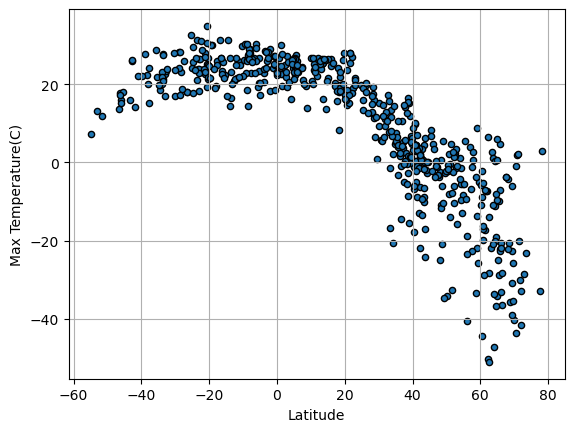

In [34]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter',x='Lat',y='Max Temp',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

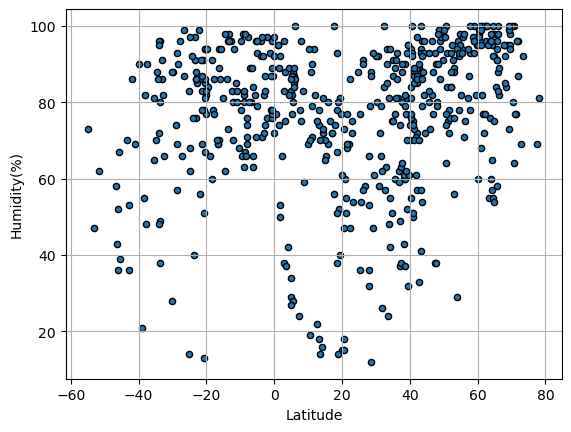

In [35]:
# Build scatter plot for latitude vs. Humidity
city_data_df.plot(kind='scatter',x='Lat',y='Humidity',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

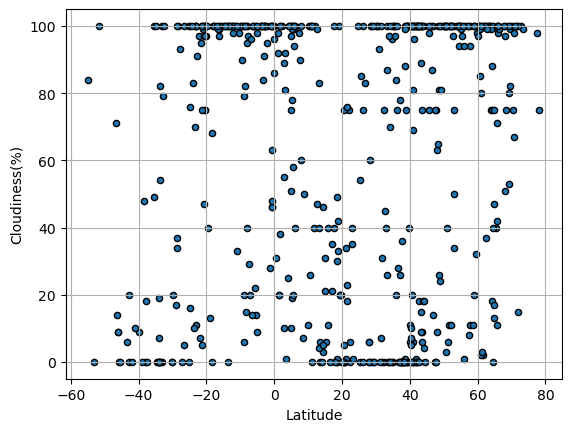

In [36]:
# Build scatter plot for latitude vs. Cloudiness
city_data_df.plot(kind='scatter',x='Lat',y='Cloudiness',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

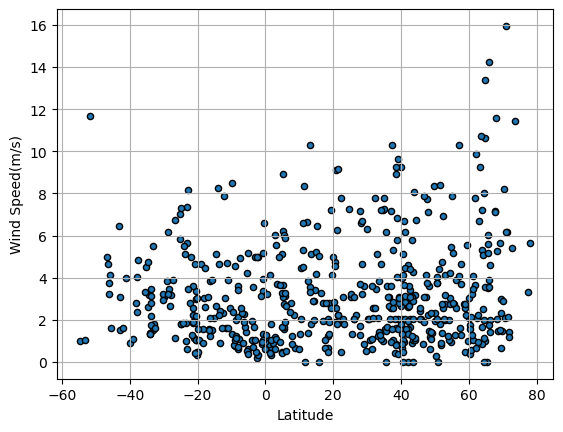

In [37]:
# Build scatter plot for latitude vs. Wind Speed
city_data_df.plot(kind='scatter',x='Lat',y='Wind Speed',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
# Add the linear regression equation and line to plot
def linearRegressionLine(x_values,y_values,x_label,y_label,annotate_xy):  
    plt.scatter(x_values,y_values,color='blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotate_xy,fontsize=15,color="red")
    print(f"The r-vlaue is: {rvalue}")
    plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chihuahua,28.5000,-106.0000,11.46,12,0,3.21,MX,1674435760
2,nikolskoye,59.7035,30.7861,-5.06,95,98,1.01,RU,1674435890
5,timmins,48.4669,-81.3331,-10.87,99,81,1.19,CA,1674435796
6,marseille,43.3333,5.5000,4.36,41,89,3.16,FR,1674435891
8,upernavik,72.7868,-56.1549,-28.59,69,100,5.43,GL,1674435322


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ulladulla,-35.3500,150.4667,21.79,65,49,4.49,AU,1674435462
3,cape town,-33.9258,18.4232,22.43,72,0,1.34,ZA,1674435602
4,vaini,-21.2000,-175.2000,27.97,69,5,2.24,TO,1674435746
7,mataura,-46.1927,168.8643,17.69,36,9,3.21,NZ,1674435794
9,codrington,-38.2667,141.9667,22.39,55,48,2.78,AU,1674435350


###  Temperature vs. Latitude Linear Regression Plot

The r-vlaue is: -0.8424473477797592


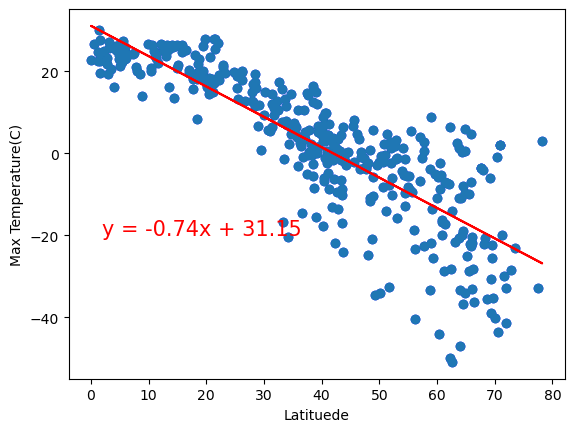

In [41]:
# Linear regression on Northern Hemisphere (Temp vs Lat)
linearRegressionLine(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],
                    'Latituede', 'Max Temperature(C)',(2,-20))


**Discussion about the linear relationship:**
<h5>Northern Hemisphere</h5>
<b><u> Linear regression on  (Temperature vs Latatitude)</u></b>
<p>| r_value | >= 0.7  shows strong correlation.Negetive sign means the <b><i>Strong Negetive Correlation</i></b></p>
<p>meaning by increasing the Latitude the Maximum Temperature decreases. The regression line shows the linear</p>
<p>estimation of this change. As shown on the plot, most of the points are next/on the regression line.</p>


 <b>--------------------------------------------------------------------------------------------------------------</b>

The r-vlaue is: 0.40257127732989606


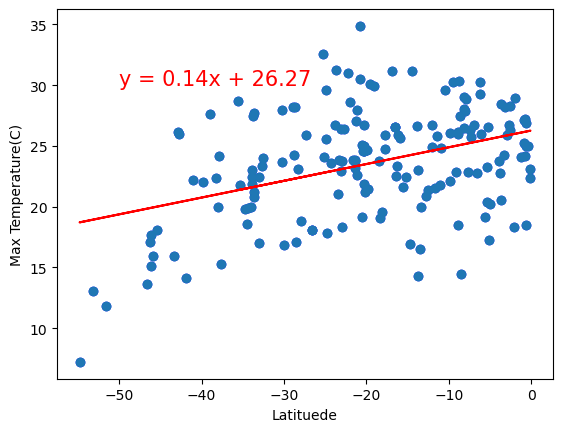

In [42]:
# Linear regression on Southern Hemisphere (temp vs Lat)
linearRegressionLine(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],
                    'Latituede', 'Max Temperature(C)',(-50,30))


**Discussion about the linear relationship:**
<h5>Southern Hemisphere</h5>
<b><u> Linear regression on  (Temperature vs Latatitude)</u></b>
<p>0.5 <= | r_value | < 0.7  shows moderate correlation.Positive sign means the <b><i>Moderate Positive Correlation</i></b></p>
<p>meaning by increasing the Latitude the Maximum Temperature increases. The regression line shows the linear</p>
<p>estimation of this change. Most of the points are located next to the line (note: Compared to the Northern's similar plot, we have less points for the regression).</p>


 <b>--------------------------------------------------------------------------------------------------------------</b>

### Humidity vs. Latitude Linear Regression Plot

The r-vlaue is: 0.35861322562604725


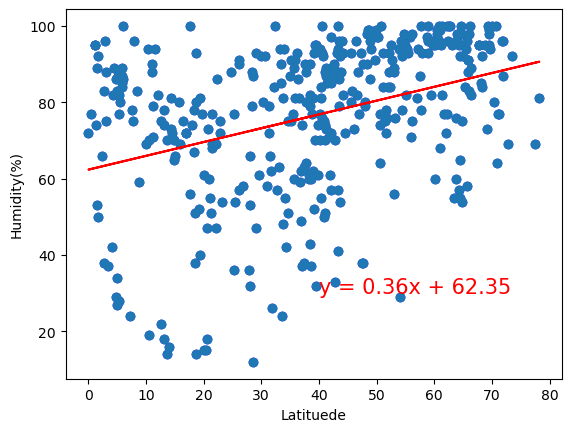

In [43]:
# Linear regression on Northern Hemisphere (Humidity vs Lat)
linearRegressionLine(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],
                    'Latituede', 'Humidity(%)',(40,30))


**Discussion about the linear relationship:**
<h5>Northern Hemisphere</h5>
<b><u> Linear regression on  (Humidity vs Latitude)</u></b>
<p> 0.3 <= | r_value | < 0.5  shows week correlation. Positive sign means the <b><i>Week Positive Correlation</i></b></p>
<p>meaning that we can not have a good prediction of Humidity  when the Latitude  changes, however we see in some areas</p>
<p>when the Latitude increases humidity tends to increase too. There are some points which are very far from the lines.</p>
<p> In the scatter plot, we can say less than 50% of the points are behaving acording to the regression line.


 <b>--------------------------------------------------------------------------------------------------------------</b>

The r-vlaue is: 0.3951050789699877


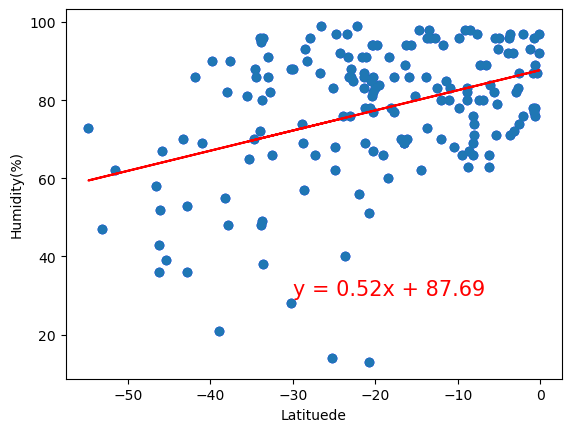

In [44]:
# Linear regression on Southern Hemisphere (Humidity vs Lat)
linearRegressionLine(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],
                    'Latituede', 'Humidity(%)',(-30,30))


**Discussion about the linear relationship:**
<h5>Southern Hemisphere</h5>
<b><u> Linear regression on  (Humidity vs Latitude)</u></b>
<p> 0.3 <= | r_value | < 0.5  shows week correlation. Positive sign means the <b><i>Week positive Correlation</i></b></p>
<p>meaning that we can not have a good prediction of Humidity  when the Latitude  changes, however in some areas humidity changes positively by the latitude</p>
<p>In the scatter plot, we see the limitted number of points are on the regression line or very close to the line. </p>

 <b>--------------------------------------------------------------------------------------------------------------</b>

### Cloudiness vs. Latitude Linear Regression Plot

The r-vlaue is: 0.23166052892016317


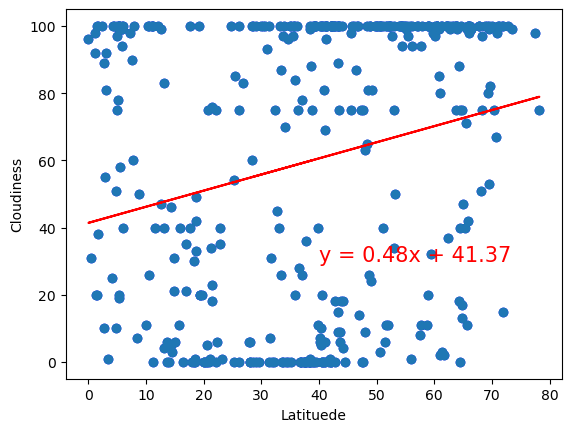

In [45]:
# Linear regression on Northern Hemisphere (Cloudiness vs Lat)
linearRegressionLine(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],
                    'Latituede', 'Cloudiness',(40,30))


**Discussion about the linear relationship:**
<h5>Northern Hemisphere</h5>
<b><u> Linear regression on  (Cloudiness vs Latitude)</u></b>
<p> | r_value | < 0.3  shows non or very week correlation. </p>
<p>meaning that we can not have any prediction of Cloudiness  when the Latitude  changes.</p>
<p> As we can see from the regression line, not many points are next to or on the line. Also the changes are 
not following the same pattern.</p>


 <b>--------------------------------------------------------------------------------------------------------------</b>
 

The r-vlaue is: 0.4621274223187661


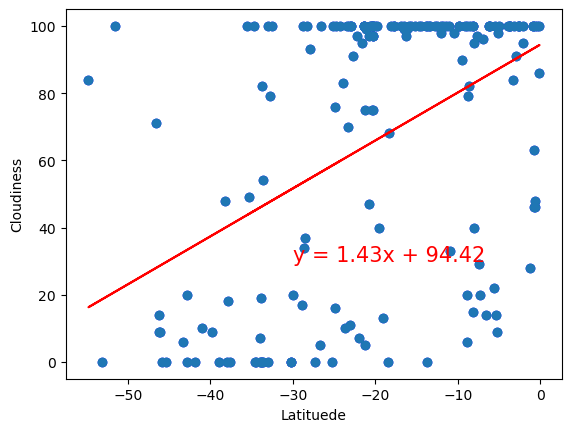

In [46]:
# Linear regression on Southern Hemisphere (Cloudiness vs Lat)
linearRegressionLine(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],
                    'Latituede', 'Cloudiness',(-30,30))


**Discussion about the linear relationship:**
<h5>Southern Hemisphere</h5>
<b><u> Linear regression on  (Cloudiness vs Latitude)</u></b>
<p> 0.3 <=| r_value | < 0.5  shows very week correlation.  </p>
<p> meaning that we can not have a meaningful prediction of Cloudiness  when the Latitude  changes.</p>
<p> As we can see from the regression line, most of the points are far from the line and does not follow the same changing pattern.</p>


 <b>--------------------------------------------------------------------------------------------------------------</b>

### Wind Speed vs. Latitude Linear Regression Plot

The r-vlaue is: 0.13561624723712318


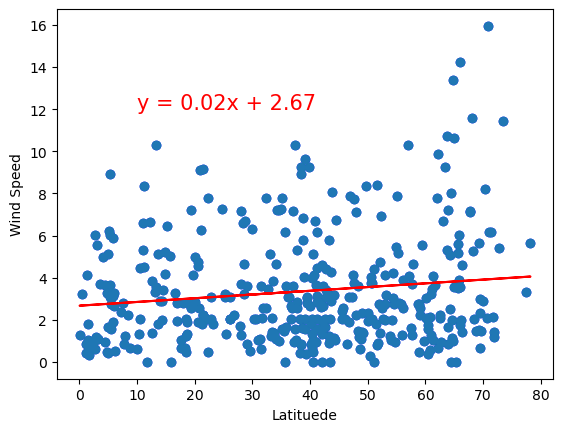

In [47]:
# Linear regression on Northern Hemisphere (Wind Speed vs Lat)
linearRegressionLine(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],
                    'Latituede', 'Wind Speed',(10,12))


**Discussion about the linear relationship:**
<h5>Northern Hemisphere</h5>
<b><u> Linear regression on  (Wind Speed vs Latitude)</u></b>
<p> | r_value | < 0.3  shows non or very week correlation. </p>
<p>meaning that we can not have any prediction of Wind Speed when the Latitude  changes.</p>
<p> As we can see from the regression line and scatter plot, in this sample data, Wind Speed is most probable to be under 7.5. </p>


 <b>--------------------------------------------------------------------------------------------------------------</b>

The r-vlaue is: -0.1922083213819348


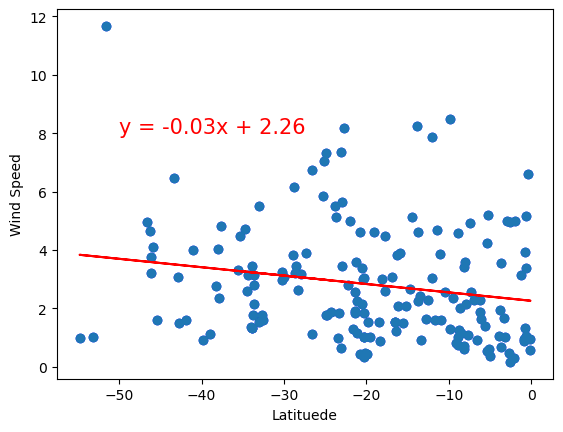

In [48]:
# Linear regression on Southern Hemisphere (Wind Speed vs Lat)
linearRegressionLine(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],
                    'Latituede', 'Wind Speed',(-50,8))


**Discussion about the linear relationship:**
<h5>Southern Hemisphere</h5>
<b><u> Linear regression on  (Wind Speed vs Latitude)</u></b>
<p> | r_value | < 0.3  shows non or very week correlation. </p>
<p>meaning that we can not have any prediction of Wind Speed when the Latitude  changes.</p>
<p> As we can see from the regression line and scatter plot, in this sample data, Wind Speed is most probable to be under 7. </p>